# K-Means (K 평균) 군집분석

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '/content/drive/MyDrive/멀티캠퍼스'

In [4]:
%cd /content/drive/MyDrive/멀티캠퍼스

/content/drive/MyDrive/멀티캠퍼스


In [5]:
raw = pd.read_excel(path + '/Online_Retail.xlsx')
df = raw.copy()
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df['Quantity'].value_counts()
# 판매량 마이너스(-) ?? 반품인가 >> 정제 필요한

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

In [9]:
# 단위 당 가격
df['UnitPrice'].value_counts()

UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: count, Length: 1630, dtype: int64

In [10]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [11]:
df['CustomerID'].isnull().sum()

135080

In [12]:
condition1 = (df['Quantity'] > 0)
condition2 = (df['UnitPrice'] > 0)
condition3 = (df['CustomerID'].notnull())

In [13]:
df = df[condition1]
df = df[condition2]
df = df[condition3]

<ipython-input-13-e0d6617dea89>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[condition2]
<ipython-input-13-e0d6617dea89>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[condition3]


In [14]:
df.shape

(397884, 8)

In [15]:
df['Quantity'][:10]

0     6
1     6
2     8
3     6
4     6
5     2
6     6
7     6
8     6
9    32
Name: Quantity, dtype: int64

In [16]:
df['UnitPrice'][:10]

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
5    7.65
6    4.25
7    1.85
8    1.85
9    1.69
Name: UnitPrice, dtype: float64

In [17]:
df['CustomerID'][:10]

0    17850.0
1    17850.0
2    17850.0
3    17850.0
4    17850.0
5    17850.0
6    17850.0
7    17850.0
8    17850.0
9    13047.0
Name: CustomerID, dtype: float64

In [18]:
# 데이터 형태 정제
# Customer ID : 자료형 변경(int 정수형)

df['CustomerID'] = df['CustomerID'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
# 중복 레코드 제거(***)
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(392692, 8)

EDA(탐색적 데이터 분석)

In [23]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
df['StockCode'].value_counts()

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64

In [25]:
len(df['StockCode'].value_counts())

3665

In [26]:
# 제품 수, 거래건수, 고객 수 탐색
pd.DataFrame([{'Product' : len(df['StockCode'].value_counts()),
                            'Transaction' : len(df['InvoiceDate'].value_counts()),
               'Customer' : len(df['CustomerID'].value_counts())
               }], index = ['counts'])

,Product,Transaction,Customer
counts,3665,17282,4338


In [27]:
df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [28]:
# 주문금액 컬럼 추가

df['SalesAmount']= df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [29]:
# 고객 마지막 주문 후 경과 일 (ElapsedDays), 주문 횟수(Freq), 주문총액(TotalAmount)

aggregation = {
    'InvoiceNo' :'count',
    'SalesAmount' : 'sum',
    'InvoiceDate' : 'max'
}

df = df.groupby('CustomerID').agg(aggregation)
df.head()

,InvoiceNo,SalesAmount,InvoiceDate
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00


In [30]:
df = df.reset_index()
df.head(3)

,CustomerID,InvoiceNo,SalesAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00


In [31]:
# 컬럼 이름 변경

df = df.rename(columns={'InvoiceNo':'Freq','InvoiceDate':'ElapsedDays'})
df.head(3)

,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00


In [32]:
# 마지막 구매 후 경과일 계산하기

import datetime

df['ElapsedDays'] = datetime.datetime(2011,12,10) - df['ElapsedDays']

In [33]:
df['ElapsedDays'] = df['ElapsedDays'].apply(lambda x : x.days + 1)

In [34]:
df.head(3)

,CustomerID,Freq,SalesAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76


# 현재 데이터 값 분포 확인

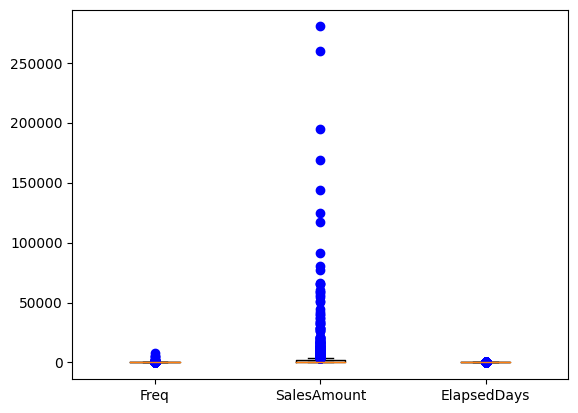

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

ax.boxplot([df['Freq'], df['SalesAmount'], df['ElapsedDays']], sym='bo')
plt.xticks([1,2,3],['Freq', 'SalesAmount', 'ElapsedDays'])

plt.show()

In [36]:
# log1p() : 주어진 숫자에 1을 더해서 자연로그(e) 계산한 것

import math

x = 0.5
math.log1p(x)
# (0.5 + 1) 한 뒤에 자연 로그 계산한 것

0.4054651081081644

In [37]:
# 로그를 취하는 이유?
# >> 위 그림 안보여?
# >> 데이터 값 왜곡(distortion) 심하잖아
# >> log 함수 사용해서 분포를 조정해야지
# log 함수로 변환 이유 : 데이터 왜도(skewness)

import numpy as np
df['Freq_log']= np.log1p(df['Freq'])
df['SalesAmount_log']= np.log1p(df['SalesAmount'])
df['ElapsedDays_log'] = np.log1p(df['ElapsedDays'])

In [38]:
df.head(3)

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805


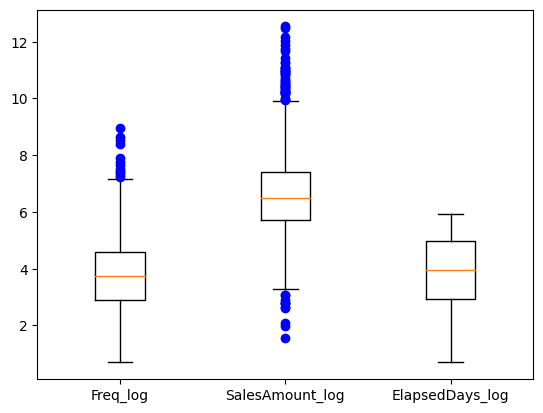

In [53]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()  # 이 부분은 필요 없습니다.
# ax.boxplot()  # 이 부분도 필요 없습니다.

fig, ax = plt.subplots()

# 로그 변환된 데이터 배열을 박스 플롯에 전달합니다.
ax.boxplot([df['Freq_log'], df['SalesAmount_log'], df['ElapsedDays_log']], sym='bo')

# x축 레이블 설정
plt.xticks([1, 2, 3], ['Freq_log', 'SalesAmount_log', 'ElapsedDays_log'])

# 플롯 표시
plt.show()

모델링
- KMeans()

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [42]:
df[['Freq_log', 'SalesAmount_log', 'ElapsedDays_log']].values

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [43]:
x_features = df[['Freq_log', 'SalesAmount_log', 'ElapsedDays_log']].values

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_features_sc = sc.fit_transform(x_features)

In [46]:
x_features_sc

array([[-2.43820181,  3.7077163 ,  1.47888429],
       [ 1.18898578,  1.41490344, -1.89064214],
       [-0.21146474,  0.72002428,  0.37233877],
       ...,
       [-0.9349095 , -1.11333158, -1.27014755],
       [ 2.29130702,  0.82281217, -1.71990073],
       [ 0.42858139,  0.73752572, -0.05585907]])

최적의 k 값 찾기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

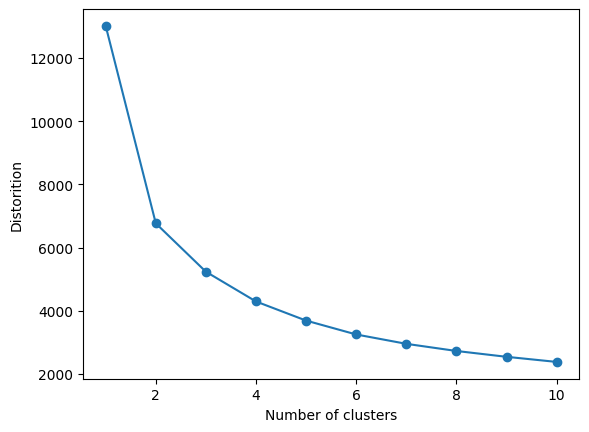

In [48]:
# Elbow

distortions = []

for i in range(1,11):
    kmeans_i = KMeans(n_clusters = i, random_state=42) #모델 생성
    kmeans_i.fit(x_features_sc) #모델 훈련(비지도학습 (라벨 x))
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorition')

plt.show()

# kmeans_i.inertia_
# kmeans에서 각 cluster 중심(centroid)과 해당 클러스터에 속한 데이터 포인트 간 제곱 거리의 합
# inertia_가 최소화하는 방향으로 클러스터 형성

In [60]:
# 음....3 아니면 4가 적절해 보이네..

kmeans = KMeans(n_clusters = 3 , random_state=42)

In [61]:
y_labels = kmeans.fit_predict(x_features_sc) # 모델이 예측한 값만 존재

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
y_labels
# 클러스터(군집) 현재 3개니깐 >>> [0,1,2]

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [64]:
df['cluster_label'] = y_labels

In [65]:
df.head(5)

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,cluster_label
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,0
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,0
4,12350,17,334.40,311,2.890372,5.815324,5.743003,2


In [66]:
df['cluster_label'].value_counts()

cluster_label
0    1830
2    1511
1     997
Name: count, dtype: int64

# 결과 분석 및 시각화

In [81]:
# 최적의 K 찾기

# 실루엣 점수

from matplotlib import cm
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks=[]

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c)/n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouetter_avg = np.mean(silhouette_values)
    # print(silhouetter_avg)

    plt.axvline(silhouetter_avg, color='red', linestyle='--')
    plt.title('Number of Cluster: '+str(n_cluster)+'\n'\
              + 'Silhouette_score: ' +str(round(silhouetter_avg, 3)))

    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

# Cluster 수에 따른 cluster 데이터 분포 시각화 함수

In [93]:
def clusterScatter(n_cluster, x_featrues):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0], x_features[y_labels ==i, 1],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


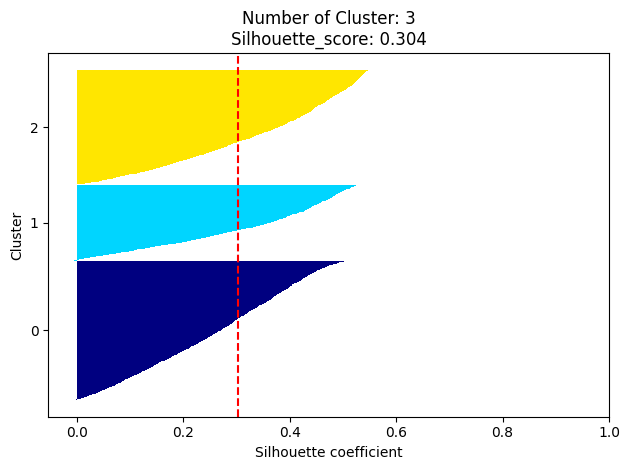

In [86]:
silhouetteviz(3, x_features_sc)
# cluster : 3개, 속성은 standard scaler 로 표준화 scaled 값 사용
# 결과 : silhouette score(각 클러스터의 비중), 0.309
# >> 4개 군집이 실루엣 점수가 더 높음

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


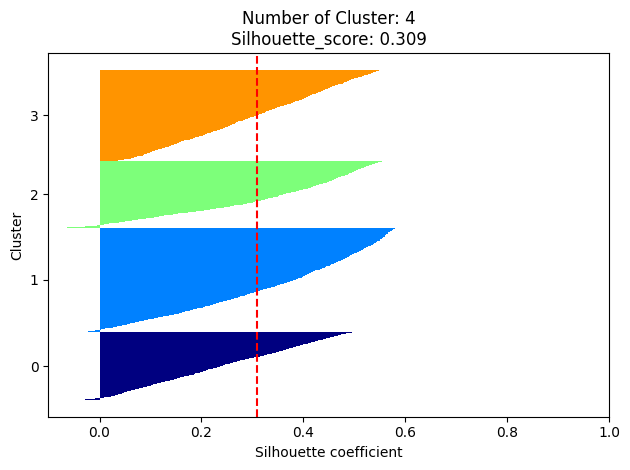

In [101]:
silhouetteviz(4, x_features_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


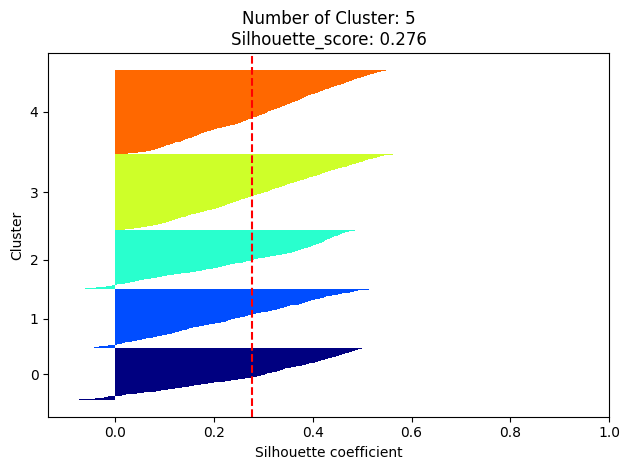

In [103]:
silhouetteviz(5, x_features_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


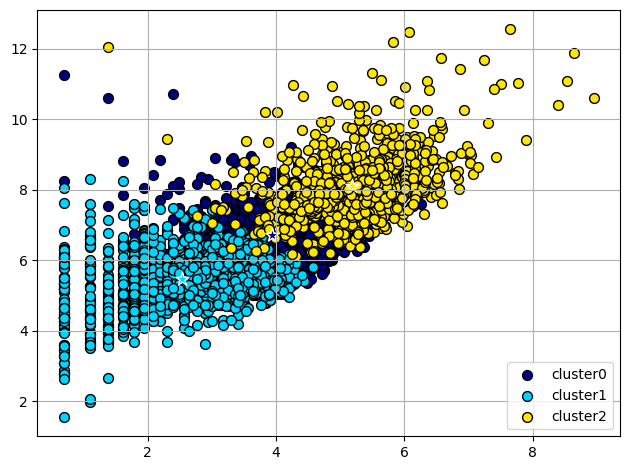

In [94]:
clusterScatter(3, x_features_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


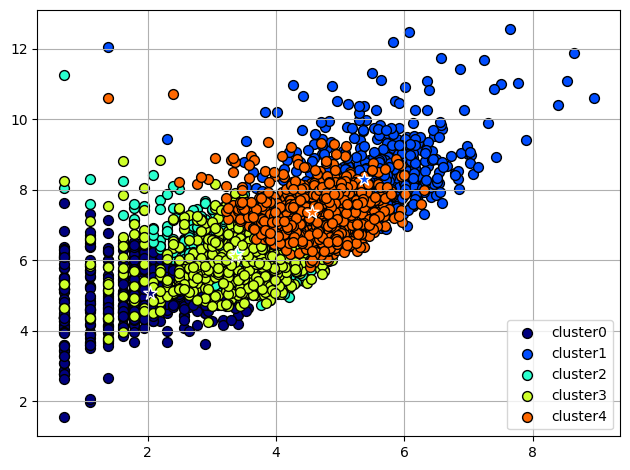

In [97]:
clusterScatter(5, x_features_sc)

In [98]:
x_features.shape

(4338, 3)

In [99]:
x_features[:,0]

array([0.69314718, 5.20948615, 3.4657359 , ..., 2.56494936, 6.58202514,
       4.26267988])

In [100]:
x_features[:,1]

array([11.25395523,  8.36892517,  7.49456369, ...,  5.1876651 ,
        7.62390095,  7.51658563])

In [102]:
kmeans.cluster_centers_

array([[ 0.14815704,  0.08006983, -0.07034678],
       [ 1.18782972,  1.2215219 , -1.09002981],
       [-0.96604988, -0.90578407,  0.80694128]])

In [104]:
kmeans.cluster_centers_.shape

(3, 3)

In [105]:
# 실루엣 분석 결과, 최적의 K는 4로 사료됨(실루엣 점수 : 0.309 )

# 결정된 k 적용, 최적의 KMeans 모델

In [140]:
best_cluster = 4

kmeans = KMeans(n_clusters=best_cluster, random_state=42)
y_labels = kmeans.fit_predict(x_features_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [148]:
df['cluster_label'] = y_labels
df.head(3)

,CustomerID,Freq,SalesAmount,ElapsedDays,Freq_log,SalesAmount_log,ElapsedDays_log,cluster_label
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,3
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,2
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,3


In [155]:
df['cluster_label'].value_counts()

cluster_label
1    1370
3    1201
0     895
2     872
Name: count, dtype: int64

In [156]:
df_cluster =pd.DataFrame(df['cluster_label'].value_counts())

In [157]:
#df_cluster.reset_index().rename(columns={'index':'cluster_label','cluster_label':'count'})

In [158]:
df_cluster = df_cluster.reset_index()

In [159]:
df_cluster.index = df_cluster.index + 1

In [160]:
df_cluster

,cluster_label,count
1,1,1370
2,3,1201
3,0,895
4,2,872


In [119]:
#df_cluster.to_csv('/Online_Retail_Customer_Cluster_TY.csv')

# 클러스터 분석

In [161]:
# 각 클러스터 고객수
df.groupby('cluster_label')['CustomerID'].count()

cluster_label
0     895
1    1370
2     872
3    1201
Name: CustomerID, dtype: int64

In [162]:
# 각 클러스터 특징

df.columns

Index(['CustomerID', 'Freq', 'SalesAmount', 'ElapsedDays', 'Freq_log',
       'SalesAmount_log', 'ElapsedDays_log', 'cluster_label'],
      dtype='object')

In [163]:
customer_df = df.drop(['Freq_log','SalesAmount_log', 'ElapsedDays_log'], axis=1)
customer_df.head(3)

,CustomerID,Freq,SalesAmount,ElapsedDays,cluster_label
0,12346,1,77183.60,326,3
1,12347,182,4310.00,3,2
2,12348,31,1797.24,76,3


In [164]:
# 주문 1회당 평균 구매 금액 : SalesAmountAVG

customer_df['SalesAmountAVG'] = customer_df['SalesAmount'] / customer_df['Freq']

In [165]:
customer_df

,CustomerID,Freq,SalesAmount,ElapsedDays,cluster_label,SalesAmountAVG
0,12346,1,77183.60,326,3,77183.600000
1,12347,182,4310.00,3,2,23.681319
2,12348,31,1797.24,76,3,57.975484
3,12349,73,1757.55,19,3,24.076027
4,12350,17,334.40,311,1,19.670588
...,...,...,...,...,...,...
4333,18280,10,180.60,278,1,18.060000
4334,18281,7,80.82,181,1,11.545714
4335,18282,12,178.05,8,0,14.837500
4336,18283,721,2045.53,4,2,2.837074


In [166]:
# 클러스터 별 분석

customer_df.drop(['CustomerID'], axis=1)

,Freq,SalesAmount,ElapsedDays,cluster_label,SalesAmountAVG
0,1,77183.60,326,3,77183.600000
1,182,4310.00,3,2,23.681319
2,31,1797.24,76,3,57.975484
3,73,1757.55,19,3,24.076027
4,17,334.40,311,1,19.670588
...,...,...,...,...,...
4333,10,180.60,278,1,18.060000
4334,7,80.82,181,1,11.545714
4335,12,178.05,8,0,14.837500
4336,721,2045.53,4,2,2.837074


In [168]:
customer_df.drop(['CustomerID'], axis=1).groupby('cluster_label').mean()

,Freq,SalesAmount,ElapsedDays,SalesAmountAVG
cluster_label,,,,
0,38.349721,608.202806,20.870391,32.118196
1,14.964234,297.675402,187.294891,43.291973
2,278.464450,7020.739553,13.612385,96.665836
3,79.139883,1509.548037,97.043297,103.489540


In [169]:
customer_df_per_group = customer_df.drop(['CustomerID'], axis=1).groupby('cluster_label').mean()

In [171]:
customer_df_per_group.index = customer_df_per_group.index + 1

In [172]:
customer_df_per_group

,Freq,SalesAmount,ElapsedDays,SalesAmountAVG
cluster_label,,,,
1,38.349721,608.202806,20.870391,32.118196
2,14.964234,297.675402,187.294891,43.291973
3,278.464450,7020.739553,13.612385,96.665836
4,79.139883,1509.548037,97.043297,103.489540
